# Detect Heart Disease — Machine Learning Project

### Predict whether a patient has heart disease based on their clinical attributes.

# 1. Environment and Imports

## 1.1 Standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.2 Ensure reproducibility

In [2]:
RANDOM_STATE = 42

## 1.3 Display options for cleaner outputs

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# 2. Loading the Dataset

## 2.1 Load dataset

In [4]:
df = pd.read_csv('/work/dataset.csv')

## 2.2 Basic Checks

In [5]:
print(f"Shape: {df.shape}")
df.head()

Shape: (1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.00,1,0
1,49,0,3,160,180,0,0,156,0,1.00,2,1
2,37,1,2,130,283,0,1,98,0,0.00,1,0
3,48,0,4,138,214,0,0,108,1,1.50,2,1
4,54,1,3,150,195,0,0,122,0,0.00,1,0


# 3. Dataset Info & Missing Values

## 3.1 Info & Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


# 4. Renaming columns to snake_case with descriptive names

In [7]:
df.rename(columns={
    'age': 'age',
    'sex': 'sex',
    'chest pain type': 'chest_pain_type',
    'resting bp s': 'resting_bp',
    'cholesterol': 'cholesterol',
    'fasting blood sugar': 'fasting_blood_sugar',
    'resting ecg': 'resting_ecg',
    'max heart rate': 'max_heart_rate',
    'exercise angina': 'exercise_angina',
    'oldpeak': 'oldpeak',
    'ST slope': 'st_slope',
    'target': 'target'
}, inplace=True)

# 5. Mapping for categorical columns

In [8]:
df['sex'] = df['sex'].map({0: 'female', 1: 'male'})

df['chest_pain_type'] = df['chest_pain_type'].map({
    1: 'typical_angina',
    2: 'atypical_angina',
    3: 'non_anginal_pain',
    4: 'asymptomatic'
})

df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
    0: 'less_than_120mg/dl',
    1: 'greater_than_120mg/dl'
})

df['resting_ecg'] = df['resting_ecg'].map({
    0: 'normal',
    1: 'st_t_wave_abnormality',
    2: 'lv_hypertrophy'
})

df['exercise_angina'] = df['exercise_angina'].map({
    0: 'no',
    1: 'yes'
})

df['st_slope'] = df['st_slope'].map({
    1: 'upsloping',
    2: 'flat',
    3: 'downsloping'
})

df['target'] = df['target'].map({
    0: 'normal',
    1: 'heart_disease'
})

# 6. Exploratory Data Analysis (EDA)

## 6.1 Value counts for categorical features

In [9]:
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
                    'resting_ecg', 'exercise_angina', 'st_slope', 'target']

for col in categorical_cols:
    print(f'\nValue counts for {col}:')
    print(df[col].value_counts())


Value counts for sex:
sex
male      909
female    281
Name: count, dtype: int64

Value counts for chest_pain_type:
chest_pain_type
asymptomatic        625
non_anginal_pain    283
atypical_angina     216
typical_angina       66
Name: count, dtype: int64

Value counts for fasting_blood_sugar:
fasting_blood_sugar
less_than_120mg/dl       936
greater_than_120mg/dl    254
Name: count, dtype: int64

Value counts for resting_ecg:
resting_ecg
normal                   684
lv_hypertrophy           325
st_t_wave_abnormality    181
Name: count, dtype: int64

Value counts for exercise_angina:
exercise_angina
no     729
yes    461
Name: count, dtype: int64

Value counts for st_slope:
st_slope
flat           582
upsloping      526
downsloping     81
Name: count, dtype: int64

Value counts for target:
target
heart_disease    629
normal           561
Name: count, dtype: int64


## 6.2 Summary statistics for numeric columns

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.00,53.72,9.36,28.00,47.00,54.00,60.00,77.00
resting_bp,1190.00,132.15,18.37,0.00,120.00,130.00,140.00,200.00
cholesterol,1190.00,210.36,101.42,0.00,188.00,229.00,269.75,603.00
max_heart_rate,1190.00,139.73,25.52,60.00,121.00,140.50,160.00,202.00
oldpeak,1190.00,0.92,1.09,-2.60,0.00,0.60,1.60,6.20


## 6.3 Target distribution

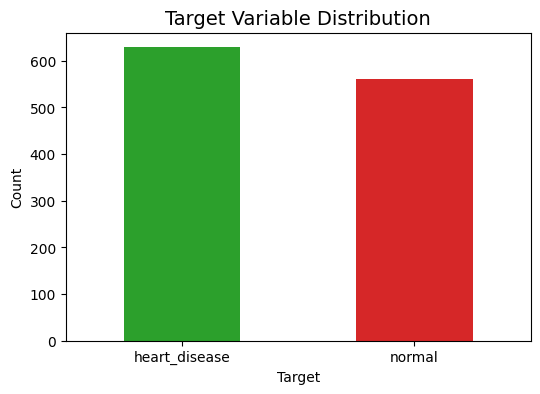

In [11]:
plt.figure(figsize=(6,4))
df['target'].value_counts().plot(kind='bar', color=['#2ca02c','#d62728'])
plt.title('Target Variable Distribution', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Target')
plt.xticks(rotation=0)
plt.show()

## 6.4 Histograms for numerical features

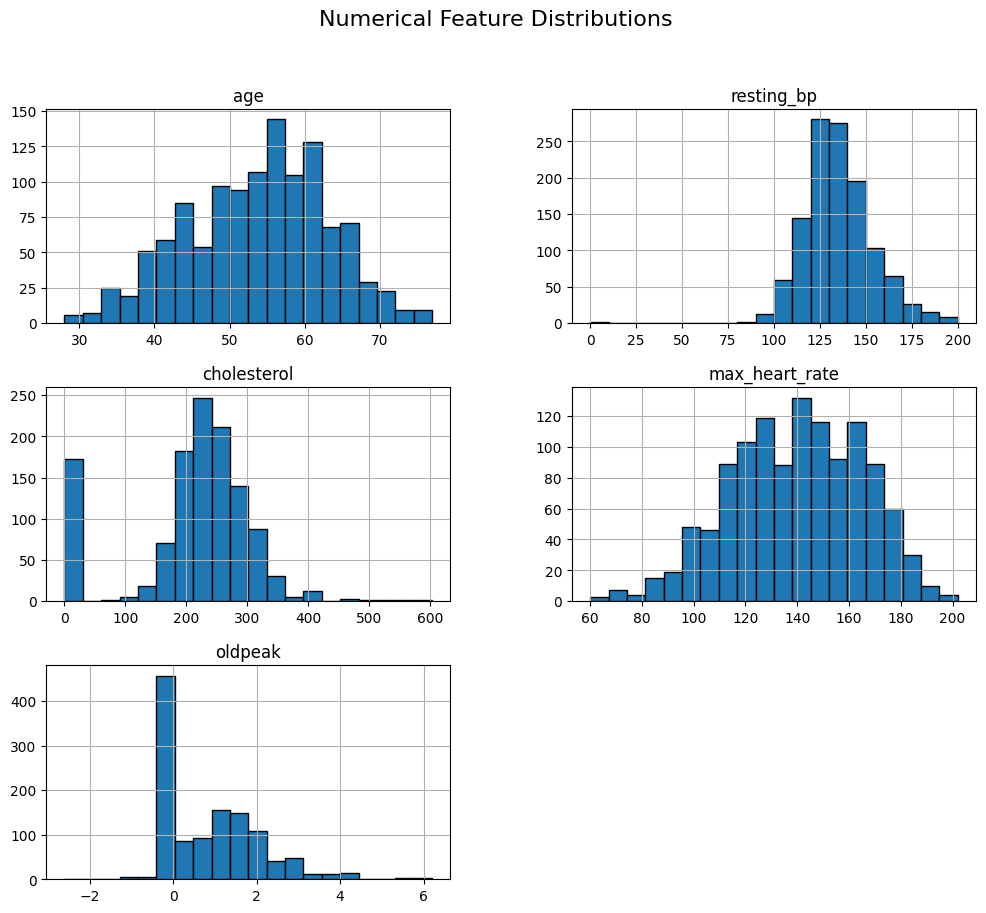

In [12]:
df[numeric_cols].hist(bins=20, figsize=(12,10), color='#1f77b4', edgecolor='black')
plt.suptitle('Numerical Feature Distributions', fontsize=16)
plt.show()

## 6.5 Correlation heatmap

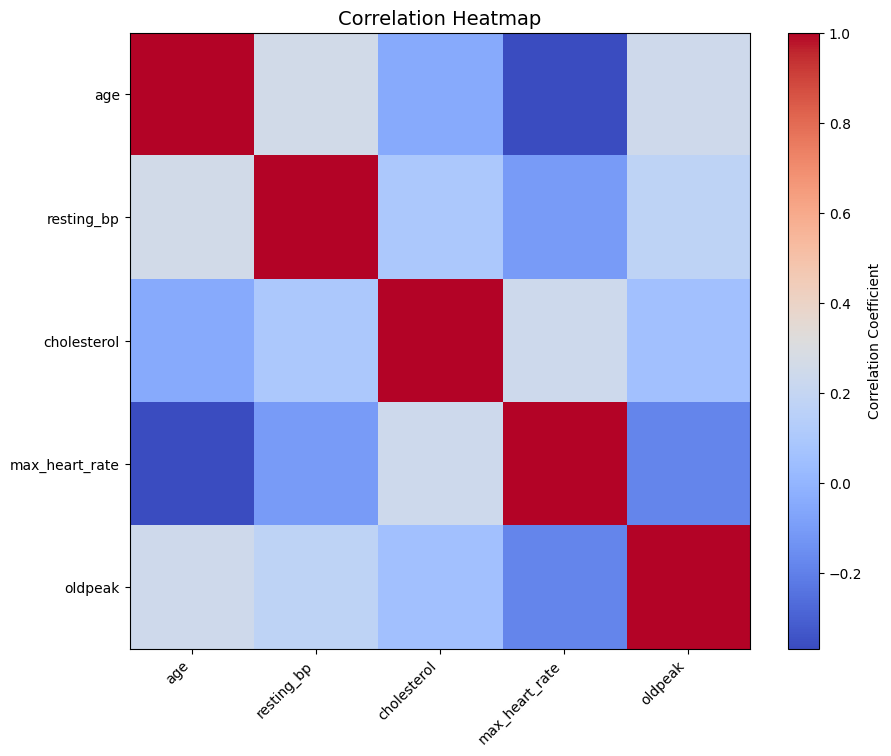

In [13]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

# 7. Bivariate Analysis

## 7.1 Categorical features vs target

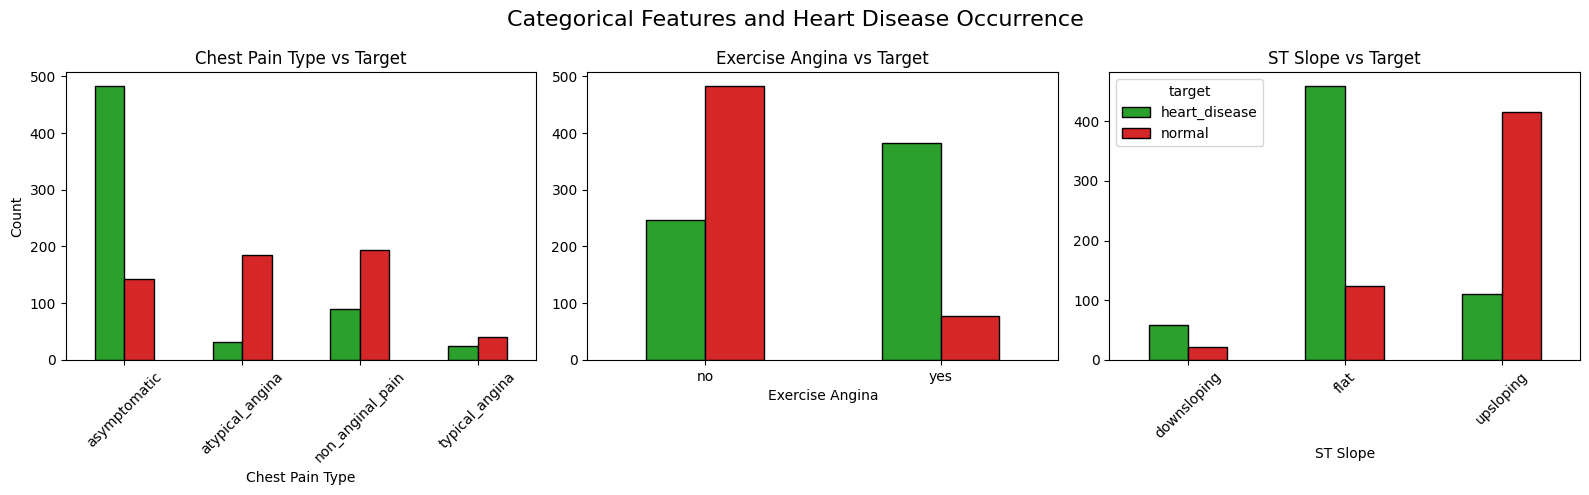

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))

# Chest Pain Type vs Target
pd.crosstab(df['chest_pain_type'], df['target']).plot(
    kind='bar', color=['#2ca02c','#d62728'], edgecolor='black', ax=axes[0], legend=False)
axes[0].set_title('Chest Pain Type vs Target')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Chest Pain Type')
axes[0].tick_params(axis='x', rotation=45)

# Exercise Angina vs Target
pd.crosstab(df['exercise_angina'], df['target']).plot(
    kind='bar', color=['#2ca02c','#d62728'], edgecolor='black', ax=axes[1], legend=False)
axes[1].set_title('Exercise Angina vs Target')
axes[1].set_xlabel('Exercise Angina')
axes[1].tick_params(axis='x', rotation=0)

# ST Slope vs Target
pd.crosstab(df['st_slope'], df['target']).plot(
    kind='bar', color=['#2ca02c','#d62728'], edgecolor='black', ax=axes[2], legend=True)
axes[2].set_title('ST Slope vs Target')
axes[2].set_xlabel('ST Slope')
axes[2].tick_params(axis='x', rotation=45)

fig.suptitle('Categorical Features and Heart Disease Occurrence', fontsize=16)
plt.tight_layout()
plt.show()

## 7.2 Numerical features vs target

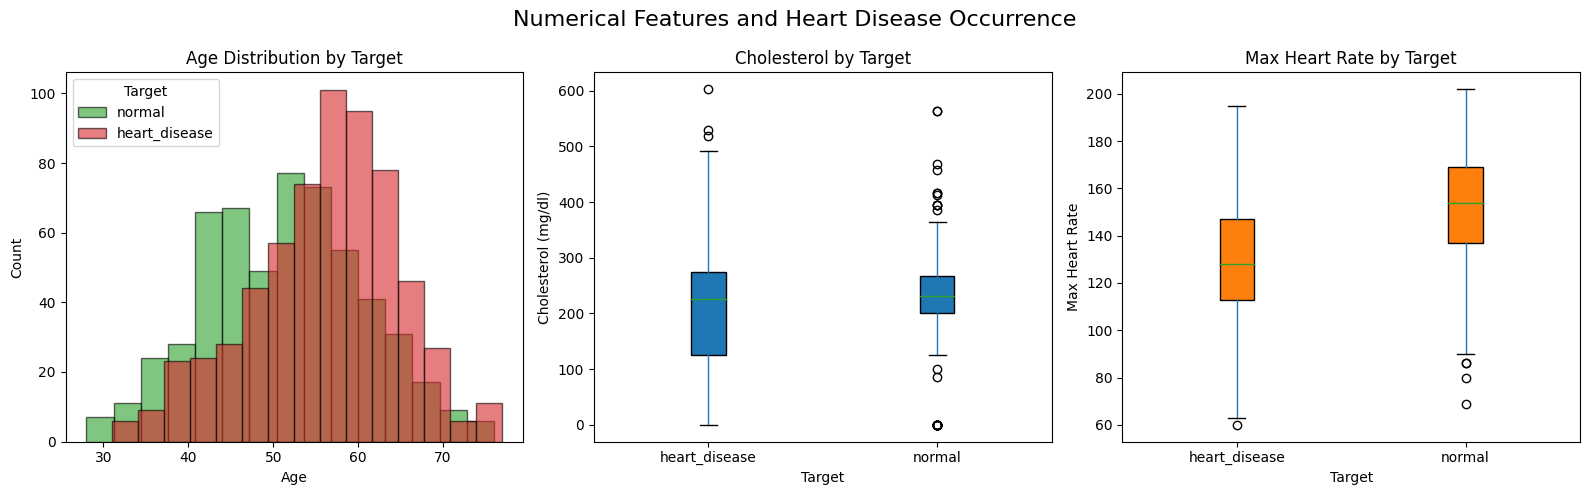

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))

# Age distribution by target
for label, color in zip(df['target'].unique(), ['#2ca02c','#d62728']):
    subset = df[df['target'] == label]
    axes[0].hist(subset['age'], bins=15, alpha=0.6, label=label, color=color, edgecolor='black')
axes[0].set_title('Age Distribution by Target')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend(title='Target')

# Cholesterol by target
df.boxplot(column='cholesterol', by='target', grid=False, patch_artist=True,
           boxprops=dict(facecolor='#1f77b4'), ax=axes[1])
axes[1].set_title('Cholesterol by Target')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Cholesterol (mg/dl)')

# Max Heart Rate by target
df.boxplot(column='max_heart_rate', by='target', grid=False, patch_artist=True,
           boxprops=dict(facecolor='#ff7f0e'), ax=axes[2])
axes[2].set_title('Max Heart Rate by Target')
axes[2].set_xlabel('Target')
axes[2].set_ylabel('Max Heart Rate')

fig.suptitle('Numerical Features and Heart Disease Occurrence', fontsize=16)
plt.tight_layout()
plt.show()

# 8. Preprocessing & Pipelines

## 8.1 Separate Features and Target

In [16]:
X = df.drop('target', axis=1)
y = df['target']

## 8.2 Identify Column Types

In [17]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print('Categorical features:', categorical_features)
print('Numeric features:', numeric_features)

Categorical features: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'st_slope']
Numeric features: ['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'oldpeak']


## 8.3 Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

## 8.4 Preprocessing Pipelines

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Categorical preprocessing
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Numerical preprocessing
numeric_transformer = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## 8.5 Combining Preprocessor with Model

In [20]:
from sklearn.linear_model import LogisticRegression

# Full Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

## 8.6 Train the Model

In [21]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'resting_bp',
                                                   'cholesterol',
                                                   'max_heart_rate',
                                                   'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'chest_pain_type',
                                                   'fasting_blood_sugar',
                                                   'resting_ecg',
                                                   'exercise_angina',
                                                   'st_slope'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

## 8.7 Evaluate the Baseline

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

heart_disease       0.83      0.83      0.83       126
       normal       0.81      0.80      0.81       112

     accuracy                           0.82       238
    macro avg       0.82      0.82      0.82       238
 weighted avg       0.82      0.82      0.82       238

Confusion Matrix:
 [[105  21]
 [ 22  90]]


Baseline Model Summary — Logistic Regression:

- Model accuracy: 82% — The model correctly predicts heart disease presence or absence for about 82 out of every 100 patients.
- Class performance:
  - *Heart disease*: Precision 0.83 means that when the model predicts "heart disease", it is correct 83% of the time. Recall 0.83 means it catches 83% of all actual heart disease cases.
  - Normal: Precision 0.81 means that when predicting "normal", it is correct 81% of the time. Recall 0.80 means it correctly identifies 80% of truly normal patients.
Confusion Matrix Interpretation:
  - Top-left (105): Normal patients correctly identified as normal.
  - Top-right (21): Normal patients incorrectly predicted as heart disease (false positives).
  - Bottom-left (22): Heart disease patients incorrectly predicted as normal (false negatives).
  - Bottom-right (90): Heart disease patients correctly identified as having the disease.

Takeaway:
The baseline Logistic Regression performs decently with balanced precision and recall for both classes. There is room for improvement, particularly in reducing false negatives (missing actual heart disease cases).


# 9. Other Model Comparison & Evaluation

## 9.1 Imports

In [23]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
import seaborn as sns

## 9.2 Models

In [24]:
models = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(random_state=RANDOM_STATE)
}

## 9.2 Training, Evaluating, and Storing Results

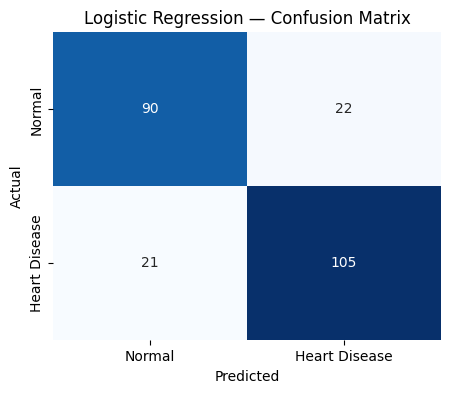

=== Logistic Regression ===
               precision    recall  f1-score   support

heart_disease       0.83      0.83      0.83       126
       normal       0.81      0.80      0.81       112

     accuracy                           0.82       238
    macro avg       0.82      0.82      0.82       238
 weighted avg       0.82      0.82      0.82       238

ROC AUC Score: 0.896



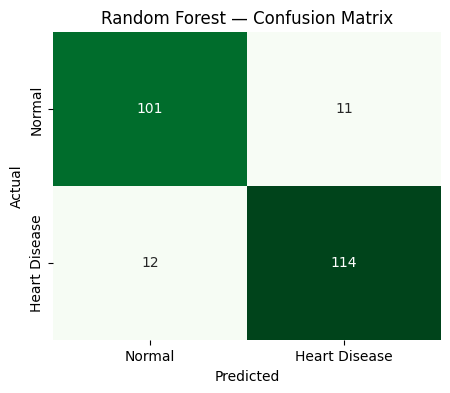

=== Random Forest ===
               precision    recall  f1-score   support

heart_disease       0.91      0.90      0.91       126
       normal       0.89      0.90      0.90       112

     accuracy                           0.90       238
    macro avg       0.90      0.90      0.90       238
 weighted avg       0.90      0.90      0.90       238

ROC AUC Score: 0.964

/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [09:25:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


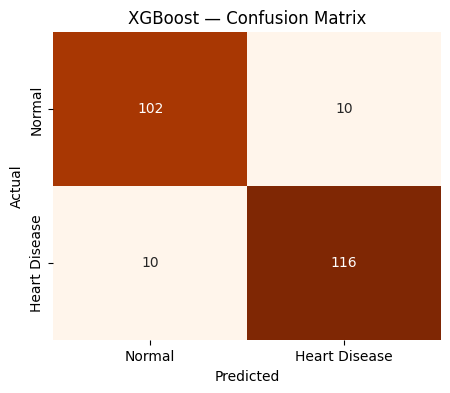

=== XGBoost ===
               precision    recall  f1-score   support

heart_disease       0.92      0.92      0.92       126
       normal       0.91      0.91      0.91       112

     accuracy                           0.92       238
    macro avg       0.92      0.92      0.92       238
 weighted avg       0.92      0.92      0.92       238

ROC AUC Score: 0.963

[LightGBM] [Info] Number of positive: 503, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528361 -> initscore=0.113567
[LightGBM] [Info] Start training from score 0.113567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


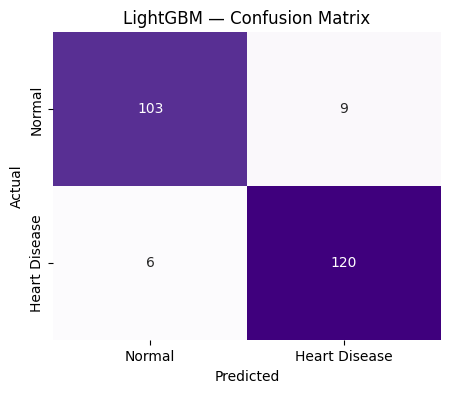

=== LightGBM ===
               precision    recall  f1-score   support

heart_disease       0.93      0.95      0.94       126
       normal       0.94      0.92      0.93       112

     accuracy                           0.94       238
    macro avg       0.94      0.94      0.94       238
 weighted avg       0.94      0.94      0.94       238

ROC AUC Score: 0.955



In [25]:
y_train_num = (y_train == 'heart_disease').astype(int)
y_test_num = (y_test == 'heart_disease').astype(int)

results = []
color_maps = ['Blues', 'Greens', 'Oranges', 'Purples']  

for i, (name, clf) in enumerate(models.items()):
    # Pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    # Train
    pipe.fit(X_train, y_train_num)
    
    # Predictions
    y_pred_num = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    # Convert numeric predictions back to labels for display
    y_pred_labels = np.where(y_pred_num == 1, 'heart_disease', 'normal')
    
    # Metrics
    auc = roc_auc_score(y_test_num, y_proba)
    report = classification_report(y_test, y_pred_labels, output_dict=True)
    
    results.append({
        "Model": name,
        "Accuracy": round(report['accuracy'], 3),
        "ROC AUC": round(auc, 3),
        "Heart Disease Precision": round(report['heart_disease']['precision'], 3),
        "Heart Disease Recall": round(report['heart_disease']['recall'], 3),
        "Normal Precision": round(report['normal']['precision'], 3),
        "Normal Recall": round(report['normal']['recall'], 3)
    })
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred_labels, labels=['normal', 'heart_disease'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color_maps[i], cbar=False,
                xticklabels=['Normal', 'Heart Disease'],
                yticklabels=['Normal', 'Heart Disease'])
    plt.title(f'{name} — Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report Text
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred_labels))
    print(f"ROC AUC Score: {auc:.3f}\n")


## 9.4 Comparison Table

In [26]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.sort_values(by="ROC AUC", ascending=False)

,Model,Accuracy,ROC AUC,Heart Disease Precision,Heart Disease Recall,Normal Precision,Normal Recall
1,Random Forest,0.90,0.96,0.91,0.91,0.89,0.90
2,XGBoost,0.92,0.96,0.92,0.92,0.91,0.91
3,LightGBM,0.94,0.95,0.93,0.95,0.94,0.92
0,Logistic Regression,0.82,0.90,0.83,0.83,0.81,0.80


## Overall Models Summary

We tested four different machine learning models to see how well they could predict whether a person has heart disease or not, based on medical data. Here’s what we found:

### 1. LightGBM

This model performed the best overall.

Out of 100 people with heart disease, it correctly identified 95 of them, and it also correctly recognized 92 out of 100 healthy people.

It had the highest accuracy (94%) and a very high ROC AUC score (0.955), meaning it’s excellent at separating sick from healthy patients.

### 2. XGBoost

Almost tied with Random Forest, this model was very consistent.

Correctly found 92 out of 100 sick people and 91 out of 100 healthy people.

Accuracy was about 92%, with a ROC AUC of 0.963.

### 3. Random Forest

Very good performance, slightly below XGBoost.

Correctly spotted 91 out of 100 sick people and 90 out of 100 healthy people.

Accuracy was about 90%, with a ROC AUC of 0.964.

### 4. Logistic Regression

This is the simplest model, often used as a starting point.

It correctly identified about 83 out of 100 sick people and 80 out of 100 healthy people.

Accuracy was 82%, and ROC AUC was 0.896, so it’s less precise than the others but still decent.

### In short:

LightGBM is the most reliable at predicting heart disease.

XGBoost and Random Forest are also very strong contenders.

Logistic Regression is a good, easy-to-explain model but not as accurate.

# 🏆 Step 10 – Final Winner & Summary

## Best Model: LightGBM

Accuracy: 94%

ROC AUC Score: 0.955 (Excellent at separating patients with and without heart disease)

Heart Disease Detection: Correctly identified 95 out of 100 patients with the condition.

Normal Detection: Correctly identified 92 out of 100 healthy patients.

## 📊 Why LightGBM Wins?

LightGBM stands out because it delivers the highest accuracy while also keeping a strong balance between detecting actual patients and avoiding false alarms for healthy individuals. Its ability to handle patterns in the data efficiently makes it perfect for medical decision support systems.

## 💡 Real-World Impact

If this model were used in a hospital, it would mean fewer missed diagnoses and fewer healthy patients being wrongly flagged, which saves lives and resources.